# Obter dados

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
X, y = boston.data, boston.target

In [4]:
X.shape, y.shape

((506, 13), (506,))

0


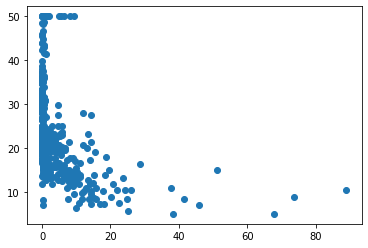

1


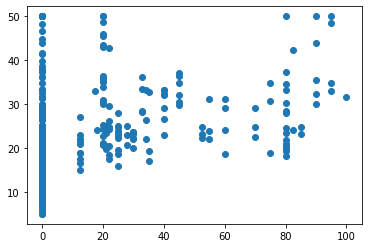

2


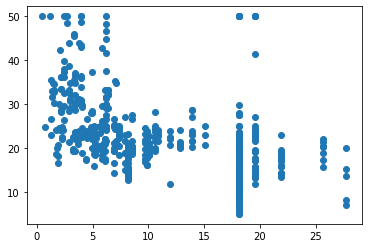

3


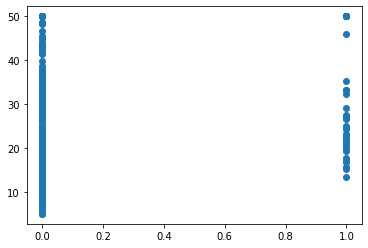

4


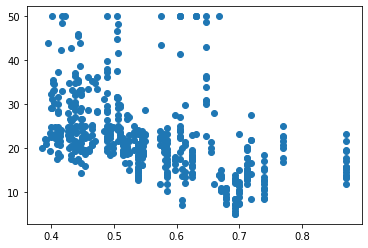

5


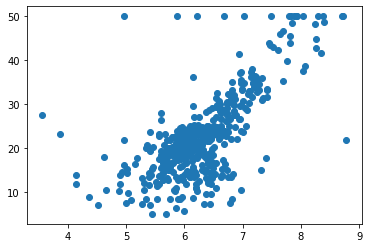

6


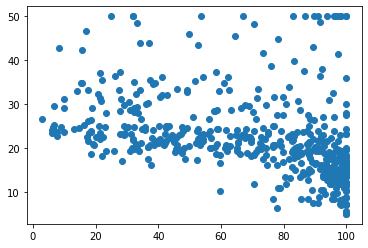

7


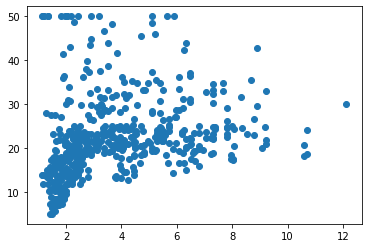

8


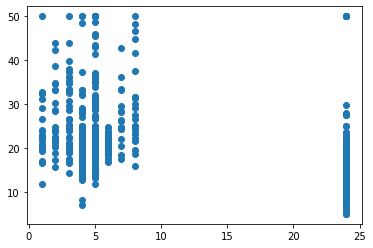

9


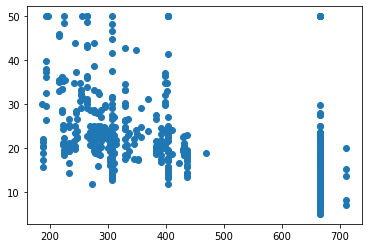

10


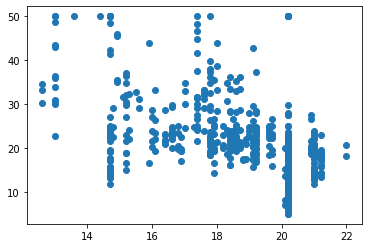

11


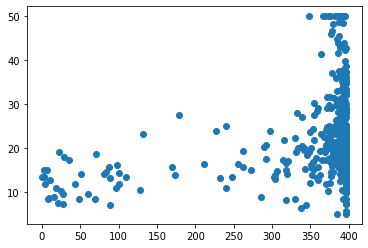

12


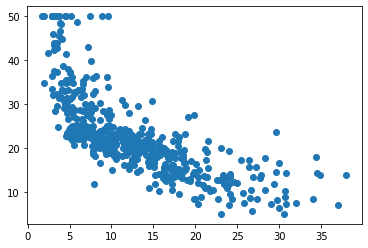

In [5]:
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

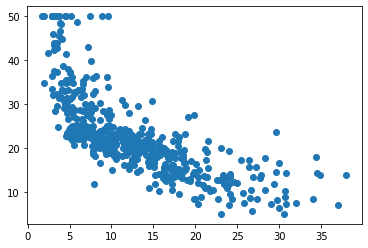

In [6]:
X12 = X[:,12:13]
plt.scatter(X12,y)
plt.show()

## Modelo linear

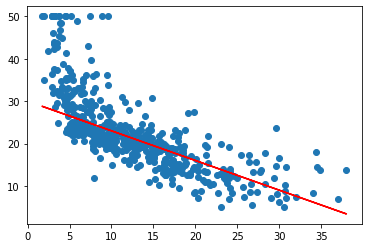

In [7]:
def modelo(X, a, b):
    y = a*X + b
    return y

ypred = modelo(X12, -0.7, 30)
plt.scatter(X12, y)
plt.plot(X12, ypred, 'r')
plt.show()

# Métrica de avaliação

## Erro Absoluto Médio

In [8]:
def mae(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yAbs = abs(yDiff)
    errorSum = sum(yAbs)
    mae = errorSum/len(yAbs)
    return mae

ypred = modelo(X12, -1, 40)
mae(y, ypred)

array([6.96547431])

## Erro Quadrático Médio

In [9]:
def mse(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return mse

ypred = modelo(X12, -1, 40)
mse(y, ypred)

array([61.78580296])

## Raiz do Erro Quadrático Médio

In [10]:
from math import sqrt

def rmse(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return sqrt(mse)

ypred = modelo(X12, -1, 40)
rmse(y, ypred)

7.860394580708203

In [11]:
ypred = modelo(X12, -0.7, 30)
rmse(y, ypred)

6.602806949970377

## sklearn.metrics.mean_squared_error

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y, ypred):
    mse = mean_squared_error(y,ypred)
    return sqrt(mse)

rmse(y, ypred)

6.602806949970374

# Método de aprendizado

In [13]:
class regressao_linear:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def predict(self, x):
        y = self.a*x + self.b
        return y

modelo_rl = regressao_linear(-0.7, 30)
ypred = modelo_rl.predict(X12)
rmse(y, ypred)

6.602806949970374

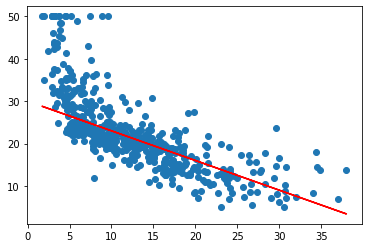

In [14]:
plt.scatter(X12, y)
plt.plot(X12, ypred, 'r')
plt.show()

## Ajuste automático

rmse inicial: 24.334069059572577
rmse final: 6.203482579490313


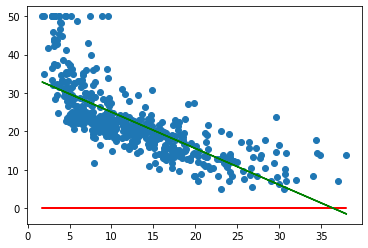

In [15]:
def rms(array):
    return sum(array**2)/len(array)

class regressao_linear:
    def __init__(self):
        self.a = 0
        self.b = 0

    def fit(self, x, y):
        if len(y.shape)<2:
            y = y.reshape(-1,1)
        for _ in range(300):
            ypred = self.predict(x)
            erro = ypred - y
            # mse = rms(erro)
            # print(mse) 
            ajusteA = sum([erro[i]*x[i] for i in range(len(x))])/sum(x)
            self.a = self.a - 0.1*ajusteA
            ajusteB = sum([erro[i] for i in range(len(erro))])/len(erro)
            self.b = self.b - 0.1*ajusteB

    def predict(self, x):
        y = self.a*x + self.b
        return y

modelo_rl = regressao_linear()
plt.scatter(X12, y)

ypred = modelo_rl.predict(X12)
erro = rmse(y, ypred)
print(f"rmse inicial: {erro}")
plt.plot(X12, ypred, 'r')

modelo_rl.fit(X12, y)

ypred = modelo_rl.predict(X12)
erro = rmse(y, ypred)
print(f"rmse final: {erro}")
plt.plot(X12, ypred, 'g')

plt.show()


# Vetorizando o modelo

rmse inicial: 24.334069059572577
rmse final: 6.203482579490314


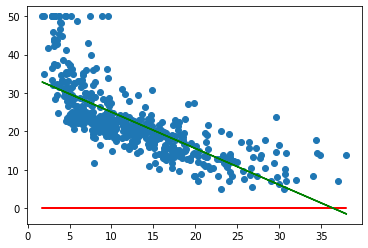

[[34.52304622]
 [-0.94817674]]


In [16]:
import numpy as np

# def rms(array):
#     return sum(array**2)/len(array)

class regressao_linear:
    def __init__(self):
        self.w = np.zeros((2,1))

    @staticmethod
    def addBias(x):
        bias = np.ones((x.shape[0],1))
        X_b = np.concatenate((bias,x),axis=1)
        return X_b

    def fit(self, x, y):
        X_b = self.addBias(x)
        if len(y.shape)<2:
            y = y.reshape(-1,1)
        for _ in range(300):
            ypred = self.predict(x)
            erro = ypred - y
            # print(ypred.shape, y.shape, erro.shape, x.shape)
            # # mse = rms(erro)
            # # print(mse) 
            # # ajusteA = sum([erro[i]*x[i] for i in range(len(x))])/sum(x)
            # ajusteA = x.T.dot(erro)/sum(x)
            # self.w[1] = self.w[1] - 0.1*ajusteA
            # ajusteB = sum([erro[i] for i in range(len(erro))])/len(erro)
            # self.w[0] = self.w[0] - 0.1*ajusteB
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
            self.w = self.w - 0.1*ajuste

    def predict(self, x):
        # y = self.w[1]*x + self.w[0]
        X_b = self.addBias(x)
        y = X_b.dot(self.w)
        return y

modelo_rl = regressao_linear()
plt.scatter(X12, y)

ypred = modelo_rl.predict(X12)
erro = rmse(y, ypred)
print(f"rmse inicial: {erro}")
plt.plot(X12, ypred, 'r')

modelo_rl.fit(X12, y)

ypred = modelo_rl.predict(X12)
erro = rmse(y, ypred)
print(f"rmse final: {erro}")
plt.plot(X12, ypred, 'g')

plt.show()
print(modelo_rl.w)

# Analisando a função do erro

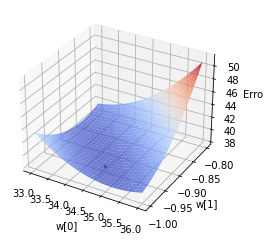

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

def z_function(W0, W1):
    modelo_rl = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo_rl.w[0] = W0[j][k]
            modelo_rl.w[1] = W1[j][k]
            ypred = modelo_rl.predict(X12)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro


w0 = np.linspace(33, 36, 30)
w1 = np.linspace(-1, -0.8, 30)

fig = plt.figure()
ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax = plt.axes(projection="3d")
ax.plot_wireframe(W0, W1, Erro)

ax = plt.axes(projection='3d')
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.75,
                cmap='coolwarm', edgecolor='none')

modelo_rl.fit(X12, y)
ypred = modelo_rl.predict(X12)
mse = mean_squared_error(y, ypred)
ax.scatter(modelo_rl.w[0],modelo_rl.w[1],mse, marker='*', s=10)

ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
ax.set_zlabel('Erro')

plt.show()

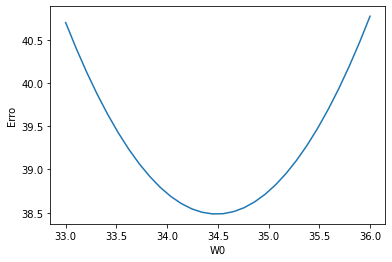

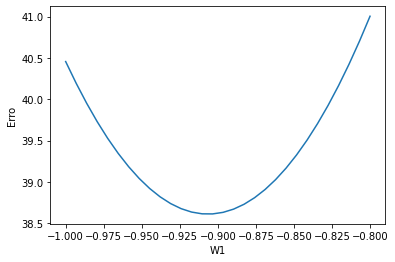

In [18]:
plt.ylabel("Erro")
plt.xlabel("W0")
i = 8
plt.plot(W0[i,:],Erro[i,:])
plt.show()

plt.ylabel("Erro")
plt.xlabel("W1")
plt.plot(W1[:,i],Erro[:,i])
plt.show()

In [19]:
class regressao_linear_plot:
    def __init__(self):
        self.w = np.zeros((2,1))
        self.wh = []
    @staticmethod
    def addBias(x):
        bias = np.ones((x.shape[0],1))
        X_b = np.concatenate((bias,x),axis=1)
        return X_b
    def fit(self, x, y):
        X_b = self.addBias(x)
        if len(y.shape)<2:
            y = y.reshape(-1,1)
        for _ in range(25):
            ypred = self.predict(x)
            erro = ypred - y
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
            self.w = self.w - 0.1*ajuste
            mse = mean_squared_error(y, ypred)
            self.wh.append([self.w[0,0],self.w[1,0],mse])
    def predict(self, x):
        X_b = self.addBias(x)
        y = X_b.dot(self.w)
        return y

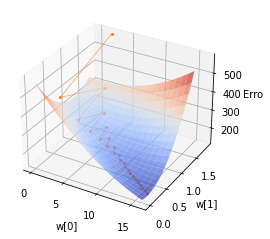

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

w0 = np.linspace(0, 16, 20)
w1 = np.linspace(0, 1.6, 20)

W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax = plt.axes(projection="3d")
ax.plot_wireframe(W0, W1, Erro)
ax = plt.axes(projection='3d')
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.75,
                cmap='coolwarm', edgecolor='none')

modelo_rl = regressao_linear_plot()
modelo_rl.fit(X12, y)
ypred = modelo_rl.predict(X12)
wh = np.array(modelo_rl.wh)
ax.plot(wh[:,0],wh[:,1],wh[:,2], marker="o", linewidth=0.5, markersize=2)

ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
ax.set_zlabel('Erro')

plt.show()

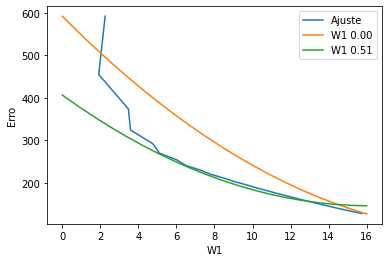

In [21]:
plt.ylabel("Erro")
plt.xlabel("W1")
plt.plot(wh[:,0],wh[:,2], label="Ajuste")
i = 0
plt.plot(W0[i,:],Erro[i,:], label=f"W1 {W1[i,0]:.2f}")
i = 6
plt.plot(W0[i,:],Erro[i,:], label=f"W1 {W1[i,0]:.2f}")
plt.legend()
plt.show()

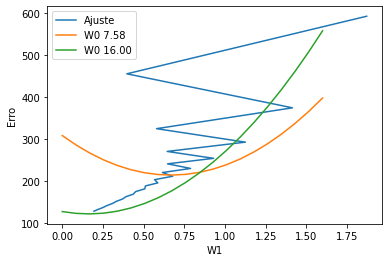

In [22]:
plt.ylabel("Erro")
plt.xlabel("W1")
plt.plot(wh[:,1],wh[:,2], label="Ajuste")
i=9
plt.plot(W1[:,i],Erro[:,i], label=f"W0 {W0[0,i]:.2f}")
i=19
plt.plot(W1[:,i],Erro[:,i], label=f"W0 {W0[0,i]:.2f}")
plt.legend()
plt.show()

In [23]:
wh[:,1]

array([1.87114556, 0.39676633, 1.41492491, 0.57928223, 1.12553991,
       0.64475541, 0.93028761, 0.64698498, 0.78879691, 0.61571463,
       0.67861996, 0.56735887, 0.58724601, 0.51094779, 0.50767508,
       0.45142181, 0.4359645 , 0.3914576 , 0.36986895, 0.33247998,
       0.30808662, 0.27522259, 0.24984125, 0.22003857, 0.19465032])

# sklearn.linear_model.LinearRegression

rmse final: 6.20346413142642


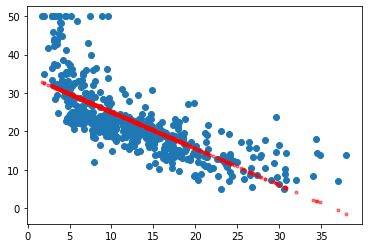

(34.5538408793831, array([-0.95004935]))

In [24]:
from sklearn.linear_model import LinearRegression

modelo_lr = LinearRegression()
plt.scatter(X12, y)

modelo_lr.fit(X12, y)

ypred = modelo_lr.predict(X12)
erro = rmse(y, ypred)
print(f"rmse final: {erro}")
plt.plot(X12, ypred, '.r', alpha=0.5)

plt.show()
modelo_lr.intercept_, modelo_lr.coef_

# Modelo multivariado

rmse final: 4.679191295697281


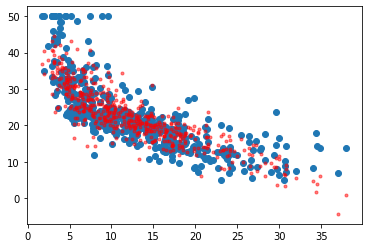

(36.459488385090125,
 array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]))

In [25]:
from sklearn.linear_model import LinearRegression

modelo_lr = LinearRegression()
plt.scatter(X12, y)

modelo_lr.fit(X, y)

ypred = modelo_lr.predict(X)
erro = rmse(y, ypred)
print(f"rmse final: {erro}")
plt.plot(X12, ypred, '.r', alpha=0.5)

plt.show()
modelo_lr.intercept_, modelo_lr.coef_